In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import joblib
from joblib import load
import time

import matplotlib
import sklearn

In [7]:
print("pandas: ", pd.__version__)
print("numpy: ", np.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib", matplotlib.__version__)
print("sklearn", sklearn.__version__)
print("joblib", joblib.__version__)


pandas:  2.0.3
numpy:  1.24.3
seaborn:  0.13.0
matplotlib 3.7.2
sklearn 1.3.0
joblib 1.2.0
pandas:  2.0.3
numpy:  1.24.3
seaborn:  0.13.0
matplotlib 3.7.2
sklearn 1.3.0
joblib 1.2.0


In [8]:
def final_test(csv, model):
    """
    Test model on unseen test set.
    """
    # 1. Read and prepare unseen test set
    unseen_df = pd.read_csv(csv)
    X_unseen = unseen_df.iloc[:, :12]
    y_unseen = unseen_df.iloc[:, 12]

    scaler = StandardScaler()
    X_unseen = scaler.fit_transform(X_unseen)

    # 2. Load model
    model = load(model)
    
    # 3. Predict and evaluate on unseen TEST set
    t0=time.time()
    y_preds_test = model.predict(X_unseen)
    t1=time.time()
    test_time=t1-t0
    cm_test = confusion_matrix(y_unseen, y_preds_test)

    # 4. Display test results
    print(f"Test time: {test_time:.4f}")
    print("Classification Report on Test Set")
    print(classification_report(y_unseen, y_preds_test))
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('CM on test set')
    plt.show()
    

Test time: 0.0024
Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.74      0.61      0.67       477
           1       0.63      0.56      0.59       567
           2       0.49      0.77      0.59       256

    accuracy                           0.62      1300
   macro avg       0.62      0.64      0.62      1300
weighted avg       0.64      0.62      0.62      1300

Test time: 0.0024
Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.74      0.61      0.67       477
           1       0.63      0.56      0.59       567
           2       0.49      0.77      0.59       256

    accuracy                           0.62      1300
   macro avg       0.62      0.64      0.62      1300
weighted avg       0.64      0.62      0.62      1300



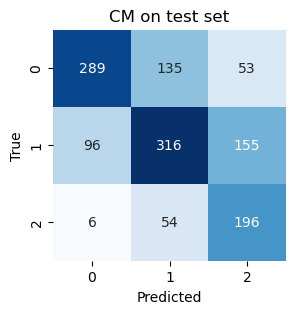

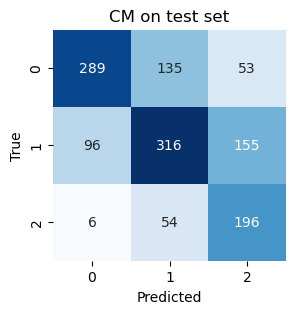

In [9]:
# Test best model on unseen test set
final_test('unseen.csv', 'best_MLP.joblib')

Test time: 0.8546
Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       477
           1       0.68      0.67      0.68       567
           2       0.63      0.71      0.67       256

    accuracy                           0.70      1300
   macro avg       0.70      0.70      0.70      1300
weighted avg       0.70      0.70      0.70      1300

Test time: 0.8546
Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       477
           1       0.68      0.67      0.68       567
           2       0.63      0.71      0.67       256

    accuracy                           0.70      1300
   macro avg       0.70      0.70      0.70      1300
weighted avg       0.70      0.70      0.70      1300



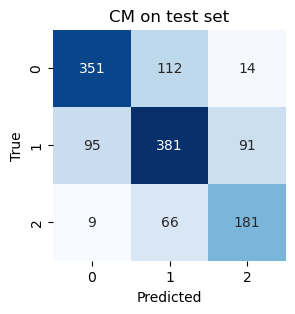

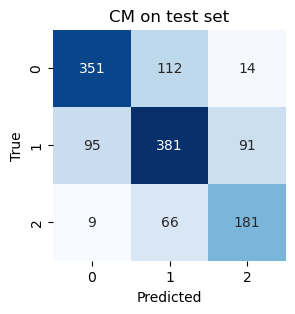

In [10]:
# Test best model on unseen test set
final_test('unseen.csv', 'best_SVM.joblib')